In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/MarketPricePrediction (1).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%B-%Y')

# Extract month and year from the 'date' column and convert month to numerical format
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Encoding categorical variables
data = pd.get_dummies(data, columns=['state', 'city'], drop_first=True)

# Display the first few rows of the preprocessed dataset
data.head()


,market,month,year,quantity,priceMin,priceMax,priceMod,date,state_ASM,state_BHR,...,city_SRIGANGANAGAR,city_SRINAGAR,city_SRIRAMPUR,city_SURAT,city_TRIVENDRUM,city_UDAIPUR,city_UJJAIN,city_VANI,city_VARANASI,city_YEOLA
0,ABOHAR(PB),1,2005,2350,404,493,446,2005-01-01,False,False,...,False,False,False,False,False,False,False,False,False,False
1,ABOHAR(PB),1,2006,900,487,638,563,2006-01-01,False,False,...,False,False,False,False,False,False,False,False,False,False
2,ABOHAR(PB),1,2010,790,1283,1592,1460,2010-01-01,False,False,...,False,False,False,False,False,False,False,False,False,False
3,ABOHAR(PB),1,2011,245,3067,3750,3433,2011-01-01,False,False,...,False,False,False,False,False,False,False,False,False,False
4,ABOHAR(PB),1,2012,1035,523,686,605,2012-01-01,False,False,...,False,False,False,False,False,False,False,False,False,False


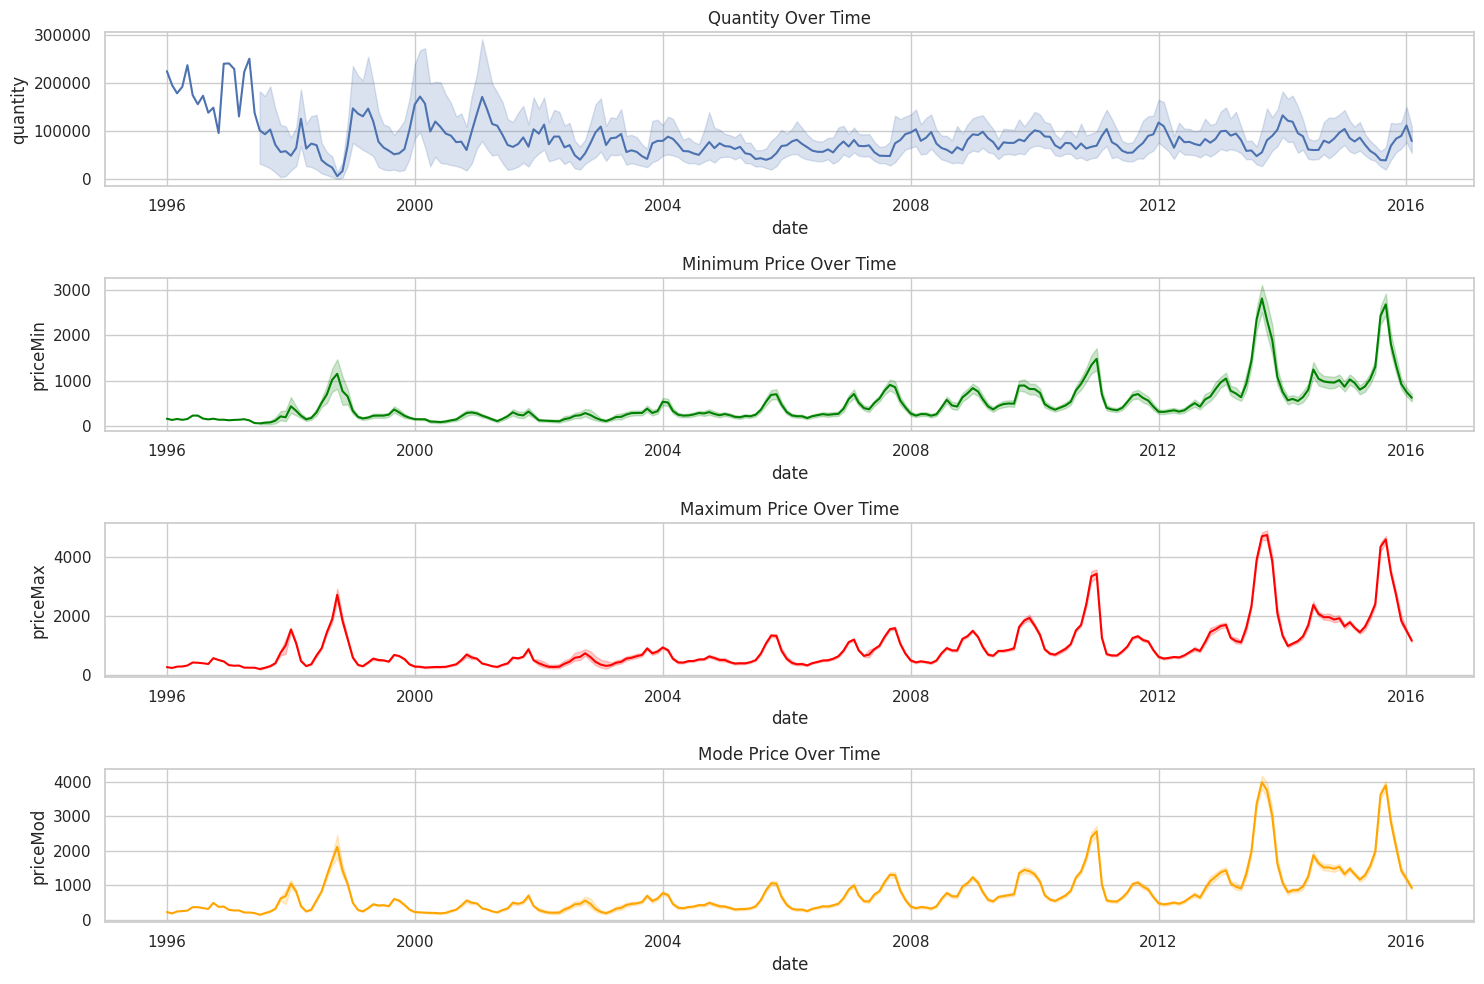

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style
plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')

# Plot time series for quantity, priceMin, priceMax, and priceMod
plt.subplot(4, 1, 1)
sns.lineplot(x='date', y='quantity', data=data)
plt.title('Quantity Over Time')

plt.subplot(4, 1, 2)
sns.lineplot(x='date', y='priceMin', data=data, color='green')
plt.title('Minimum Price Over Time')

plt.subplot(4, 1, 3)
sns.lineplot(x='date', y='priceMax', data=data, color='red')
plt.title('Maximum Price Over Time')

plt.subplot(4, 1, 4)
sns.lineplot(x='date', y='priceMod', data=data, color='orange')
plt.title('Mode Price Over Time')

plt.tight_layout()
plt.show()


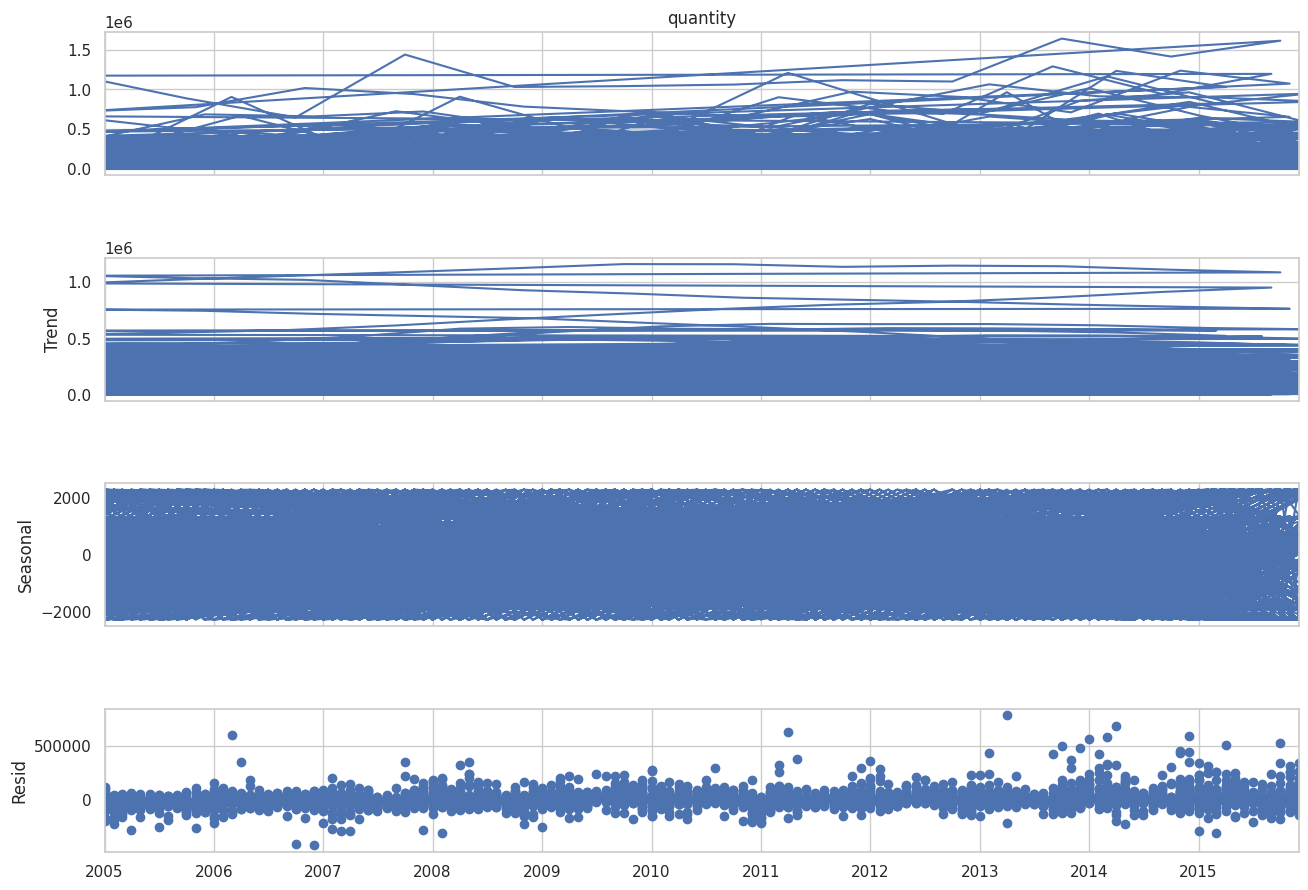

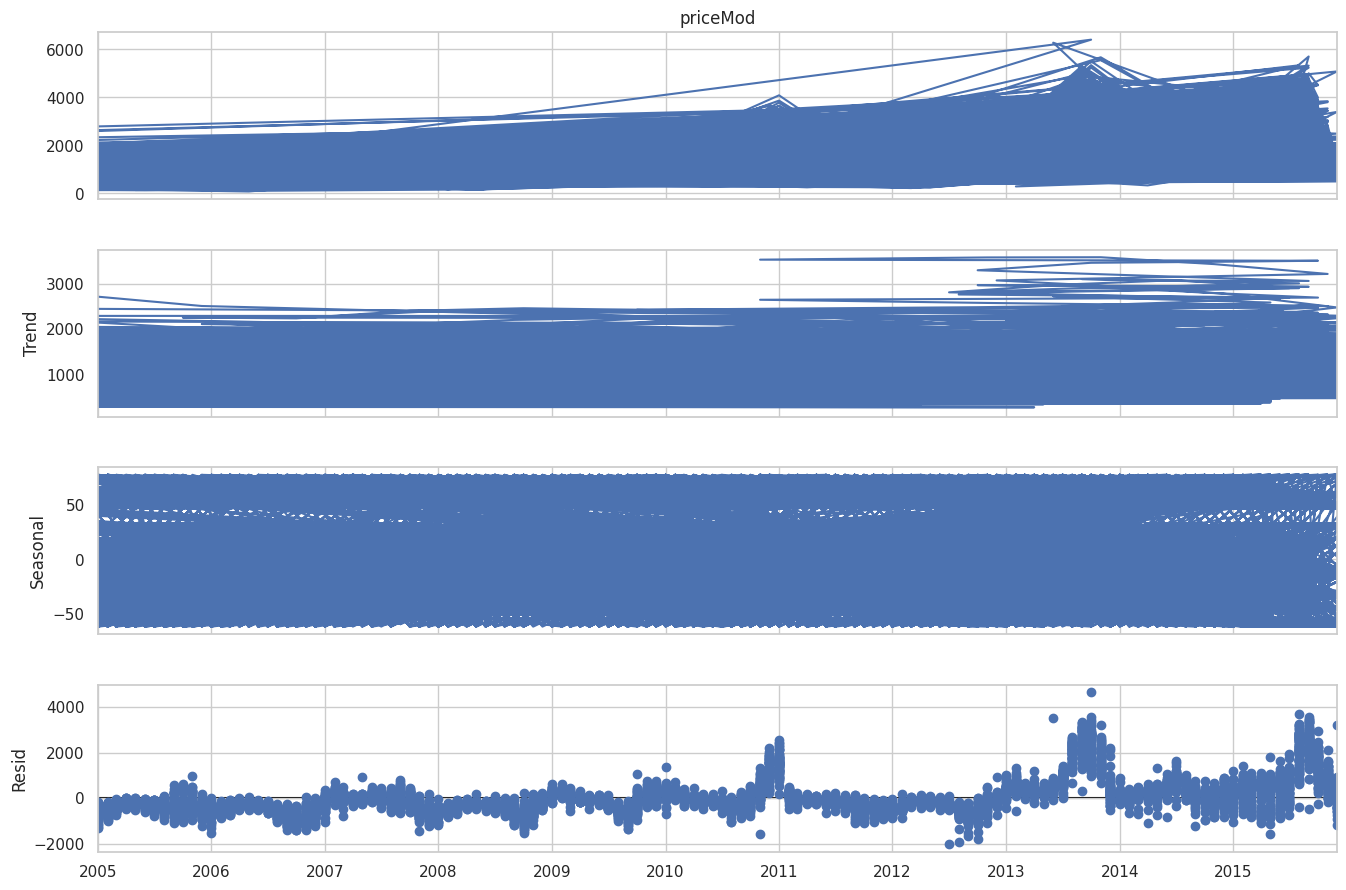

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the 'quantity' time series
decomposition_quantity = seasonal_decompose(data.set_index('date')['quantity'], model='additive', period=12)
fig_quantity = decomposition_quantity.plot()
fig_quantity.set_size_inches(15, 10)

# Decompose the 'priceMod' time series
decomposition_priceMod = seasonal_decompose(data.set_index('date')['priceMod'], model='additive', period=12)
fig_priceMod = decomposition_priceMod.plot()
fig_priceMod.set_size_inches(15, 10)

plt.show()


In [ ]:
# Create lagged features for quantity and priceMod
data['quantity_lag1'] = data['quantity'].shift(1)
data['priceMod_lag1'] = data['priceMod'].shift(1)

# Create rolling mean features for quantity and priceMod
data['quantity_roll_mean_3'] = data['quantity'].rolling(window=3).mean()
data['priceMod_roll_mean_3'] = data['priceMod'].rolling(window=3).mean()

# Drop rows with NaN values generated by shifting
data.dropna(inplace=True)

# Display the first few rows of the dataset with new features
data.head()


,market,month,year,quantity,priceMin,priceMax,priceMod,date,state_ASM,state_BHR,...,city_TRIVENDRUM,city_UDAIPUR,city_UJJAIN,city_VANI,city_VARANASI,city_YEOLA,quantity_lag1,priceMod_lag1,quantity_roll_mean_3,priceMod_roll_mean_3
2,ABOHAR(PB),1,2010,790,1283,1592,1460,2010-01-01,False,False,...,False,False,False,False,False,False,900.0,563.0,1346.666667,823.000000
3,ABOHAR(PB),1,2011,245,3067,3750,3433,2011-01-01,False,False,...,False,False,False,False,False,False,790.0,1460.0,645.000000,1818.666667
4,ABOHAR(PB),1,2012,1035,523,686,605,2012-01-01,False,False,...,False,False,False,False,False,False,245.0,3433.0,690.000000,1832.666667
5,ABOHAR(PB),1,2013,675,1327,1900,1605,2013-01-01,False,False,...,False,False,False,False,False,False,1035.0,605.0,651.666667,1881.000000
6,ABOHAR(PB),1,2014,440,1025,1481,1256,2014-01-01,False,False,...,False,False,False,False,False,False,675.0,1605.0,716.666667,1155.333333


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = data.drop(['quantity', 'priceMin', 'priceMax', 'priceMod', 'date', 'market'], axis=1)
y_quantity = data['quantity']
y_priceMod = data['priceMod']

X_train, X_test, y_quantity_train, y_quantity_test, y_priceMod_train, y_priceMod_test = train_test_split(X, y_quantity, y_priceMod, test_size=0.2, random_state=42)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model for quantity prediction
arima_quantity = ARIMA(y_quantity_train, order=(5, 1, 0))
arima_quantity_fit = arima_quantity.fit()

# Make predictions
quantity_predictions = arima_quantity_fit.forecast(steps=len(y_quantity_test))

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_quantity = mean_absolute_error(y_quantity_test, quantity_predictions)
mse_quantity = mean_squared_error(y_quantity_test, quantity_predictions)
rmse_quantity = mean_squared_error(y_quantity_test, quantity_predictions, squared=False)

(mae_quantity, mse_quantity, rmse_quantity)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

(69002.75819009167, 14857494208.189354, 121891.3212997109)

In [ ]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Split the data into training and testing sets
X = data.drop(['quantity', 'priceMin', 'priceMax', 'priceMod', 'date', 'market'], axis=1)
y_quantity = data['quantity']
y_priceMod = data['priceMod']

X_train, X_test, y_quantity_train, y_quantity_test, y_priceMod_train, y_priceMod_test = train_test_split(
    X, y_quantity, y_priceMod, test_size=0.2, random_state=42)

# Train ARIMA model for quantity prediction
arima_quantity = ARIMA(y_quantity_train, order=(5, 1, 0))
arima_quantity_fit = arima_quantity.fit()

# Make predictions
quantity_predictions = arima_quantity_fit.forecast(steps=len(y_quantity_test))

# Evaluate the model
mae_quantity = mean_absolute_error(y_quantity_test, quantity_predictions)
mse_quantity = mean_squared_error(y_quantity_test, quantity_predictions)
rmse_quantity = mean_squared_error(y_quantity_test, quantity_predictions, squared=False)

(mae_quantity, mse_quantity, rmse_quantity)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

(69002.75819009167, 14857494208.189354, 121891.3212997109)

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MarketPricePrediction (1).csv')

# Data Preprocessing
def preprocess_data(data):
    # Handle missing values
    data.fillna(method='ffill', inplace=True)

    # Encode categorical variables
    label_encoder = LabelEncoder()
    data['market'] = label_encoder.fit_transform(data['market'])
    data['state'] = label_encoder.fit_transform(data['state'])
    data['city'] = label_encoder.fit_transform(data['city'])

    # Convert date to datetime format
    data['date'] = pd.to_datetime(data['date'])
    data.set_index('date', inplace=True)

    return data

data = preprocess_data(data)
print(data.head())


            market    month  year  quantity  priceMin  priceMax  priceMod  \
date                                                                        
2005-01-01       0  January  2005      2350       404       493       446   
2006-01-01       0  January  2006       900       487       638       563   
2010-01-01       0  January  2010       790      1283      1592      1460   
2011-01-01       0  January  2011       245      3067      3750      3433   
2012-01-01       0  January  2012      1035       523       686       605   

            state  city  
date                     
2005-01-01     16     0  
2006-01-01     16     0  
2010-01-01     16     0  
2011-01-01     16     0  
2012-01-01     16     0  


<ipython-input-30-3179df2901fd>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


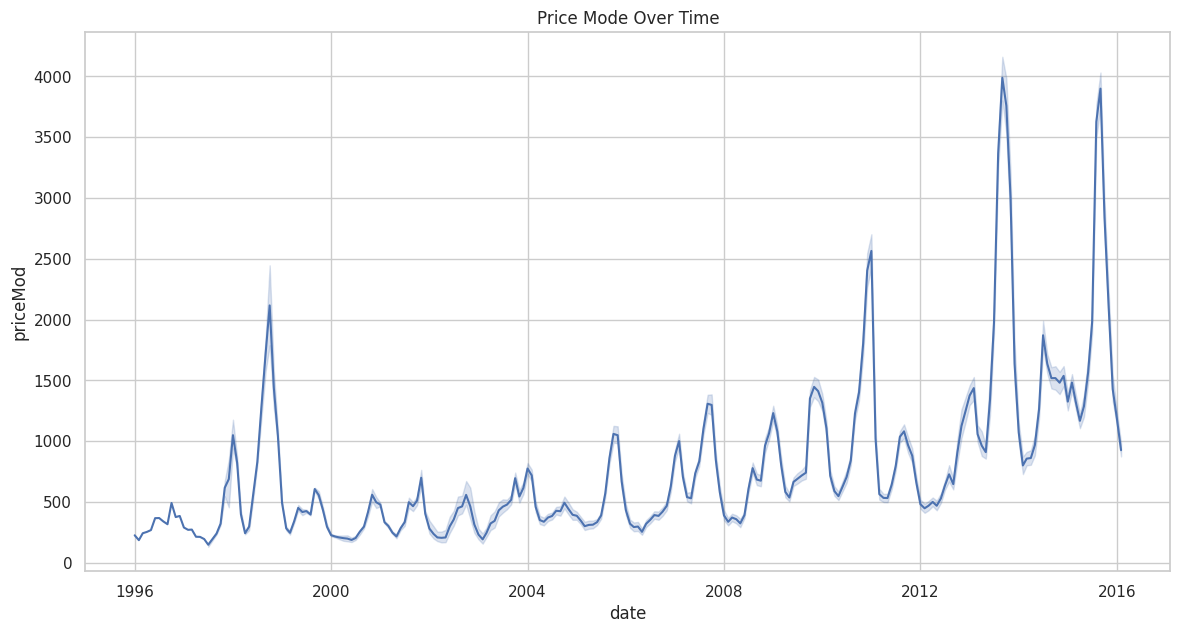

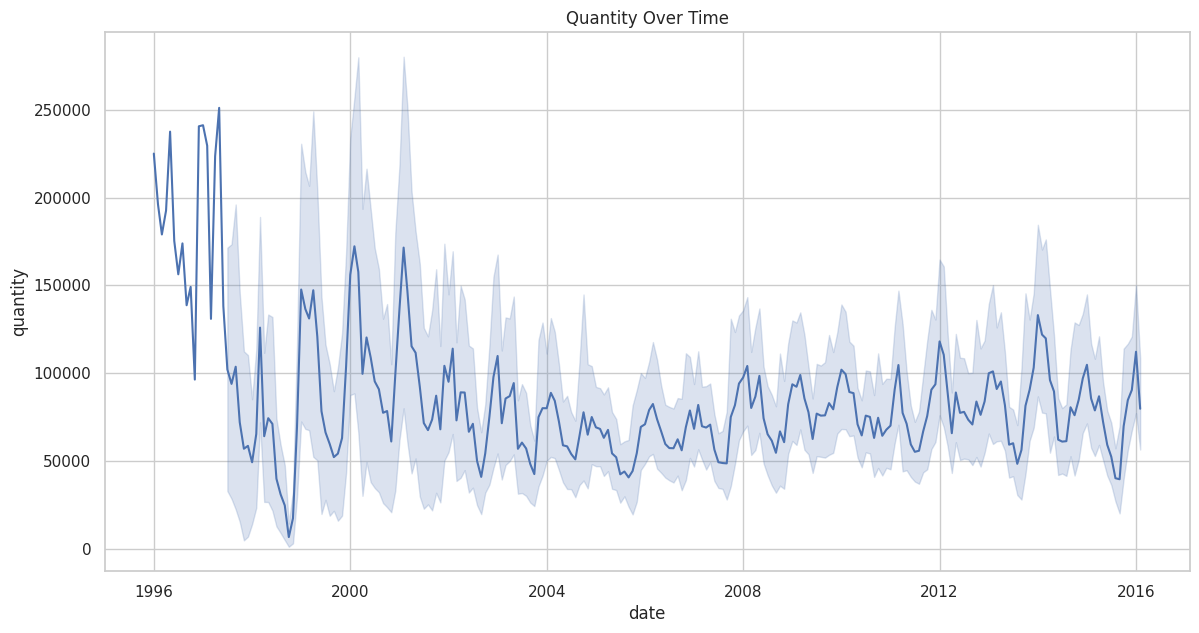

In [31]:
# Exploratory Data Analysis (EDA)
def plot_eda(data):
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=data, x='date', y='priceMod')
    plt.title('Price Mode Over Time')
    plt.show()

    plt.figure(figsize=(14, 7))
    sns.lineplot(data=data, x='date', y='quantity')
    plt.title('Quantity Over Time')
    plt.show()

plot_eda(data)


In [32]:
# Feature Engineering
def create_features(data):
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['lag_priceMod'] = data['priceMod'].shift(1)
    data['rolling_mean_priceMod'] = data['priceMod'].rolling(window=3).mean()
    data['lag_quantity'] = data['quantity'].shift(1)
    data['rolling_mean_quantity'] = data['quantity'].rolling(window=3).mean()
    return data.dropna()

data = create_features(data)
print(data.head())


            market  month  year  quantity  priceMin  priceMax  priceMod  \
date                                                                      
2010-01-01       0      1  2010       790      1283      1592      1460   
2011-01-01       0      1  2011       245      3067      3750      3433   
2012-01-01       0      1  2012      1035       523       686       605   
2013-01-01       0      1  2013       675      1327      1900      1605   
2014-01-01       0      1  2014       440      1025      1481      1256   

            state  city  lag_priceMod  rolling_mean_priceMod  lag_quantity  \
date                                                                         
2010-01-01     16     0         563.0             823.000000         900.0   
2011-01-01     16     0        1460.0            1818.666667         790.0   
2012-01-01     16     0        3433.0            1832.666667         245.0   
2013-01-01     16     0         605.0            1881.000000        1035.0   
2014-0

In [49]:
pip install pandas numpy matplotlib seaborn statsmodels prophet keras scikit-learn


In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMA Model
def sarima_model(train, test):
    model = SARIMAX(train['priceMod'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    return predictions

pred_sarima = sarima_model(train, test)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [44]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
def arima_model(train, test):
    model = ARIMA(train['priceMod'], order=(5,1,0))
    model_fit = model.fit()
    predictions = model_fit.forecast(steps=len(test))
    return predictions

# Split the data
train, test = train_test_split(data, test_size=0.2, shuffle=False)
pred_arima = arima_model(train, test)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [37]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# LSTM Model
def lstm_model(train, test):
    X_train, y_train = train[['lag_priceMod', 'rolling_mean_priceMod']].values, train['priceMod'].values
    X_test, y_test = test[['lag_priceMod', 'rolling_mean_priceMod']].values, test['priceMod'].values

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    predictions = model.predict(X_test)
    return predictions.flatten()

pred_lstm = lstm_model(train, test)


64/64 [==============================] - 0s 2ms/step


In [52]:
from prophet import Prophet

# Prophet Model
def prophet_model(train, test):
    train_prophet = train.reset_index()[['date', 'priceMod']].rename(columns={'date': 'ds', 'priceMod': 'y'})
    model = Prophet()
    model.fit(train_prophet)
    future = model.make_future_dataframe(periods=len(test), freq='MS')
    forecast = model.predict(future)
    return forecast['yhat'].iloc[-len(test):].values

pred_prophet = prophet_model(train, test)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ei_q4dx/qfppw_16.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_ei_q4dx/dn0sxnax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85454', 'data', 'file=/tmp/tmp_ei_q4dx/qfppw_16.json', 'init=/tmp/tmp_ei_q4dx/dn0sxnax.json', 'output', 'file=/tmp/tmp_ei_q4dx/prophet_modelmgobwovi/prophet_model-20240520103348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:33:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:33:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score


# Model Evaluation
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_arima, mse_arima, rmse_arima, r2_arima = evaluate_model(test['priceMod'], pred_arima)
mae_sarima, mse_sarima, rmse_sarima, r2_sarima = evaluate_model(test['priceMod'], pred_sarima)
mae_prophet, mse_prophet, rmse_prophet, r2_prophet = evaluate_model(test['priceMod'], pred_prophet)
mae_lstm, mse_lstm, rmse_lstm, r2_lstm = evaluate_model(test['priceMod'], pred_lstm)

print("ARIMA - MAE: {:.3f}, MSE: {:.3f}, RMSE: {:.3f}, R2: {:.3f}".format(mae_arima, mse_arima, rmse_arima, r2_arima))
print("SARIMA - MAE: {:.3f}, MSE: {:.3f}, RMSE: {:.3f}, R2: {:.3f}".format(mae_sarima, mse_sarima, rmse_sarima, r2_sarima))
print("Prophet - MAE: {:.3f}, MSE: {:.3f}, RMSE: {:.3f}, R2: {:.3f}".format(mae_prophet, mse_prophet, rmse_prophet, r2_prophet))
print("LSTM - MAE: {:.3f}, MSE: {:.3f}, RMSE: {:.3f}, R2: {:.3f}".format(mae_lstm, mse_lstm, rmse_lstm, r2_lstm))



ARIMA - MAE: 542.175, MSE: 791888.667, RMSE: 889.881, R2: -0.331
SARIMA - MAE: 508.615, MSE: 618537.731, RMSE: 786.472, R2: -0.040
Prophet - MAE: 2458.230, MSE: 7246279.204, RMSE: 2691.891, R2: -11.180
LSTM - MAE: 300.714, MSE: 208748.982, RMSE: 456.891, R2: 0.649


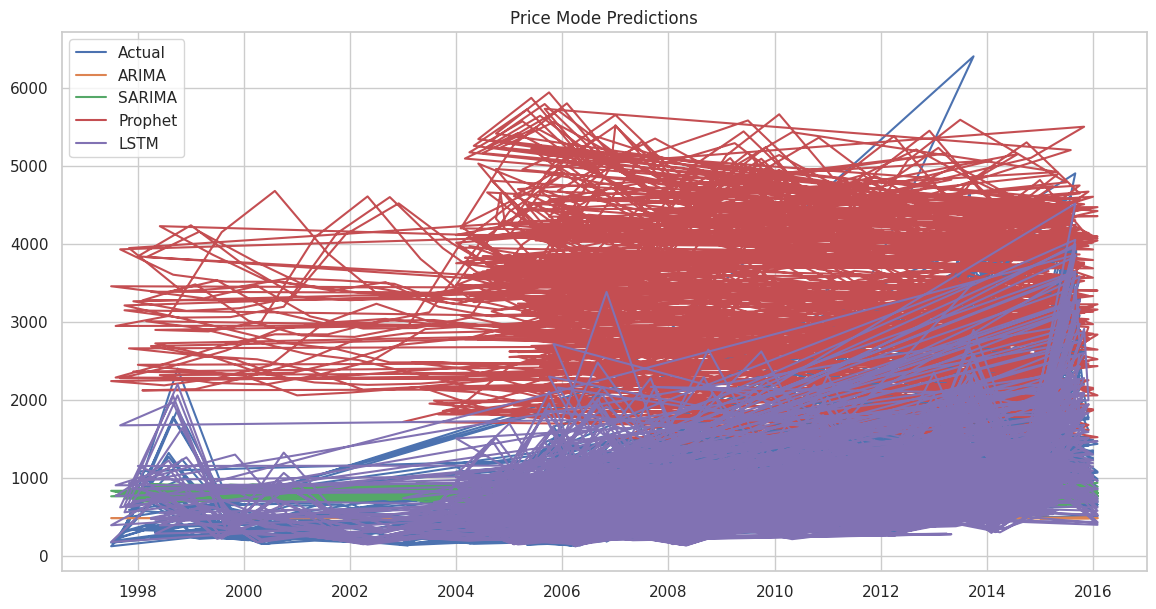

In [61]:
# Plot predictions
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['priceMod'], label='Actual')
plt.plot(test.index, pred_arima, label='ARIMA')
plt.plot(test.index, pred_sarima, label='SARIMA')
plt.plot(test.index, pred_prophet, label='Prophet')
plt.plot(test.index, pred_lstm, label='LSTM')
plt.legend()
plt.title('Price Mode Predictions')
plt.show()


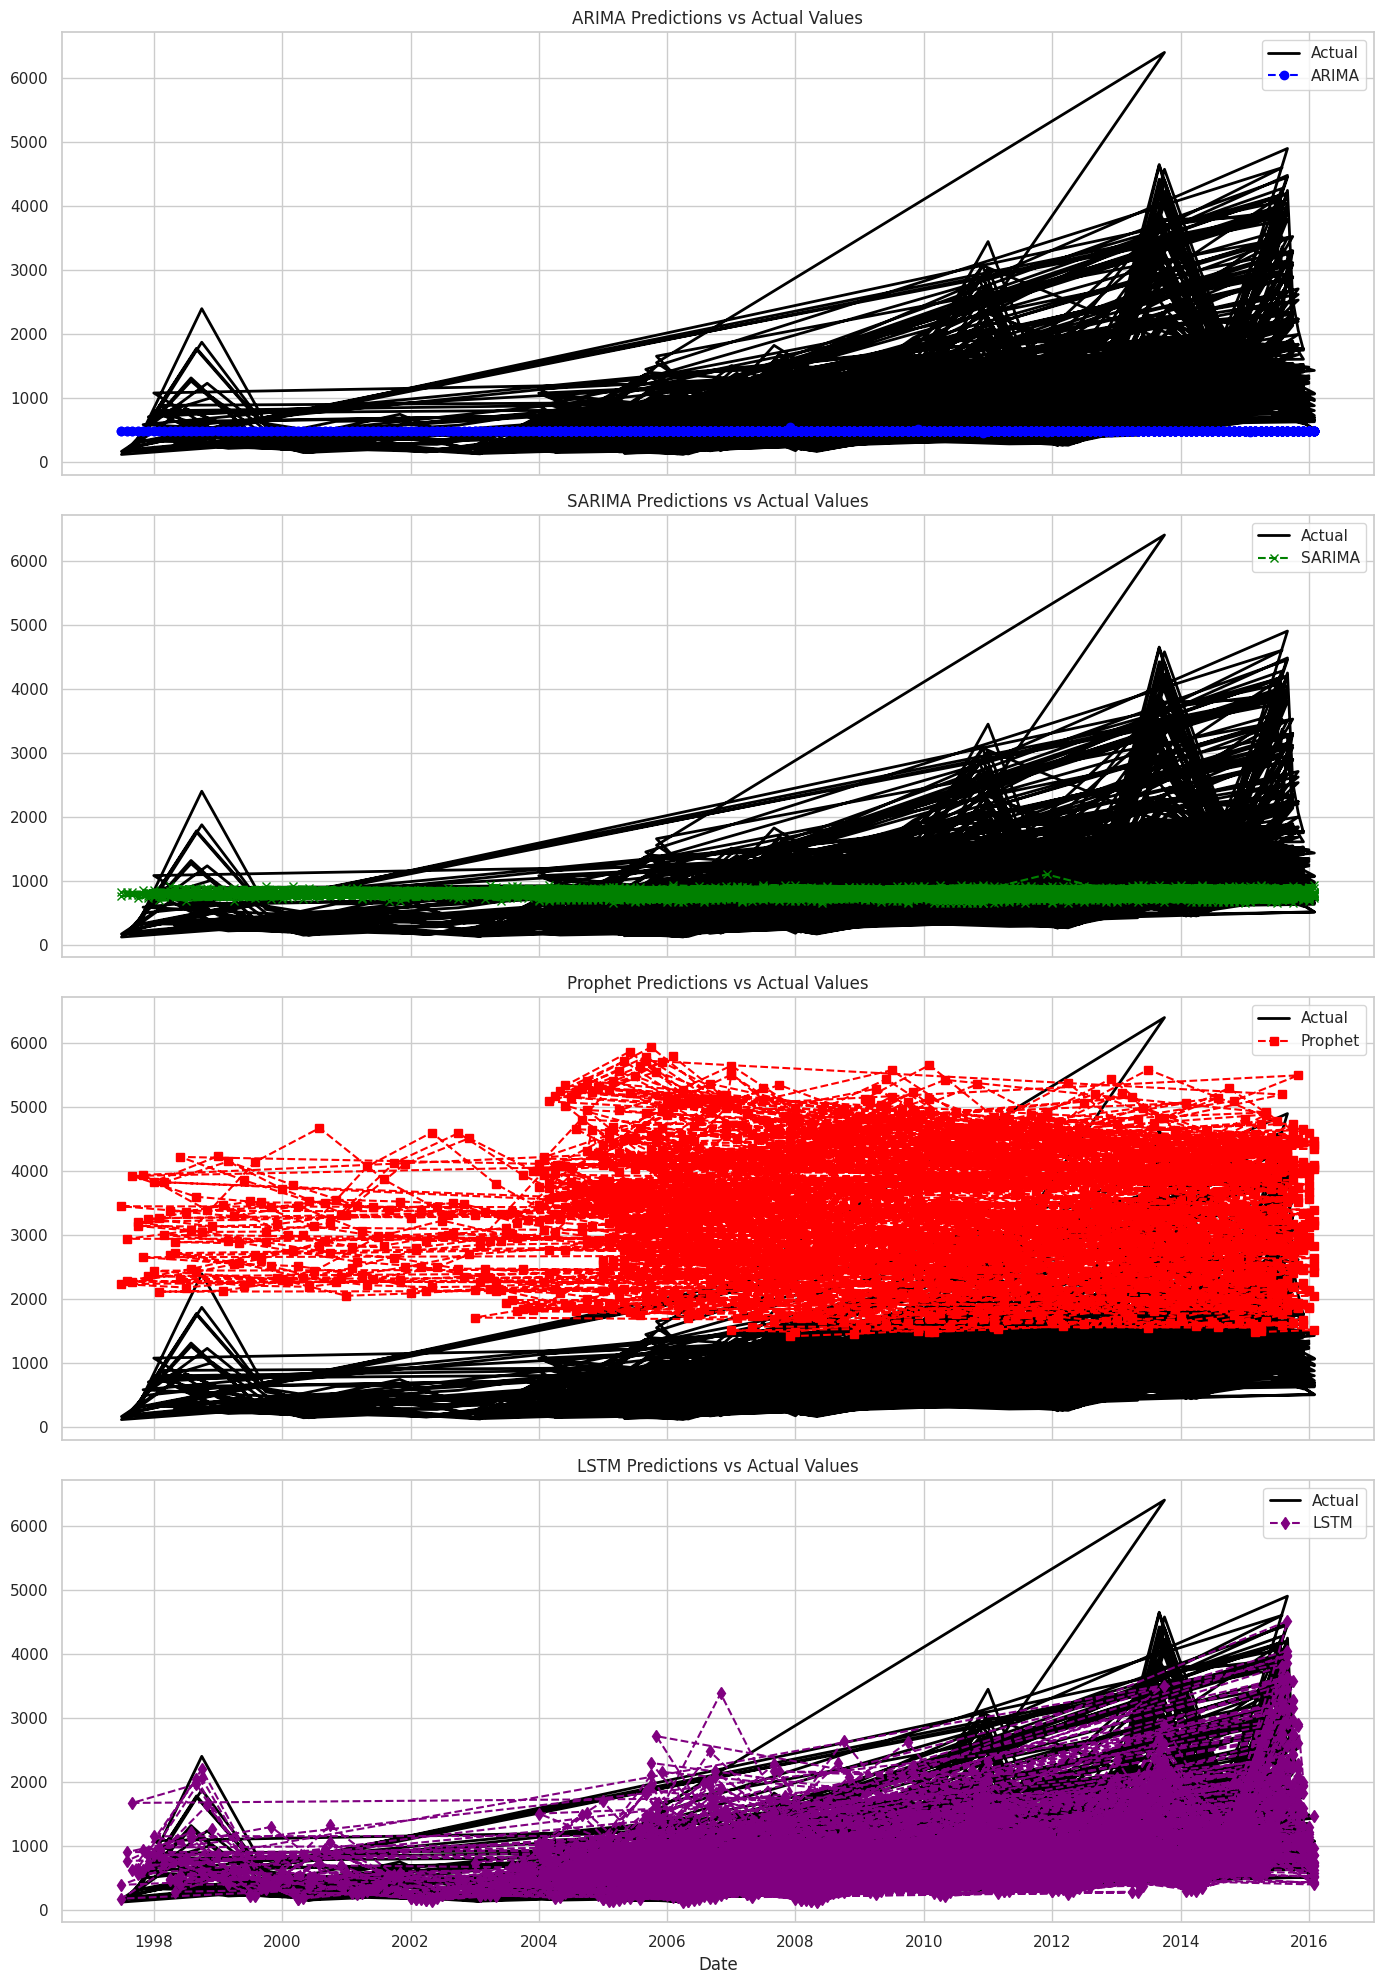

In [63]:
# Enhanced plot predictions with separate subplots for each model
fig, axes = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

# Plot actual values
axes[0].plot(test.index, test['priceMod'], label='Actual', color='black', linestyle='-', linewidth=2)
axes[1].plot(test.index, test['priceMod'], label='Actual', color='black', linestyle='-', linewidth=2)
axes[2].plot(test.index, test['priceMod'], label='Actual', color='black', linestyle='-', linewidth=2)
axes[3].plot(test.index, test['priceMod'], label='Actual', color='black', linestyle='-', linewidth=2)

# Plot ARIMA predictions
axes[0].plot(test.index, pred_arima, label='ARIMA', linestyle='--', marker='o', color='blue')
axes[0].set_title('ARIMA Predictions vs Actual Values')
axes[0].legend()
axes[0].grid(True)

# Plot SARIMA predictions
axes[1].plot(test.index, pred_sarima, label='SARIMA', linestyle='--', marker='x', color='green')
axes[1].set_title('SARIMA Predictions vs Actual Values')
axes[1].legend()
axes[1].grid(True)

# Plot Prophet predictions
axes[2].plot(test.index, pred_prophet, label='Prophet', linestyle='--', marker='s', color='red')
axes[2].set_title('Prophet Predictions vs Actual Values')
axes[2].legend()
axes[2].grid(True)

# Plot LSTM predictions
axes[3].plot(test.index, pred_lstm, label='LSTM', linestyle='--', marker='d', color='purple')
axes[3].set_title('LSTM Predictions vs Actual Values')
axes[3].legend()
axes[3].grid(True)

# Enhance overall plot
plt.xlabel('Date')
plt.tight_layout()

# Show plot
plt.show()


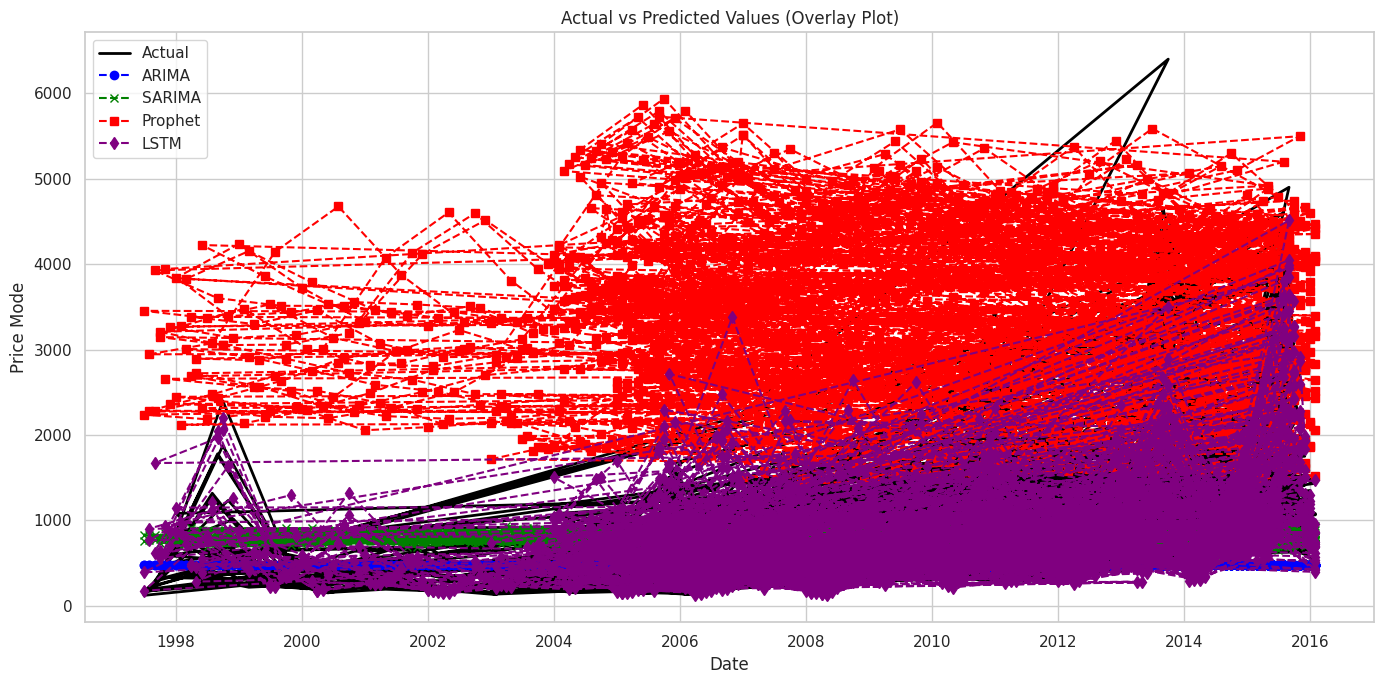

In [66]:
# Overlay plot for actual vs. predicted values from all models
plt.figure(figsize=(14, 7))

# Plot actual values
plt.plot(test.index, test['priceMod'], label='Actual', color='black', linestyle='-', linewidth=2)

# Plot ARIMA predictions
plt.plot(test.index, pred_arima, label='ARIMA', linestyle='--', marker='o', color='blue')

# Plot SARIMA predictions
plt.plot(test.index, pred_sarima, label='SARIMA', linestyle='--', marker='x', color='green')

# Plot Prophet predictions
plt.plot(test.index, pred_prophet, label='Prophet', linestyle='--', marker='s', color='red')

# Plot LSTM predictions
plt.plot(test.index, pred_lstm, label='LSTM', linestyle='--', marker='d', color='purple')

# Enhance plot
plt.legend()
plt.title('Actual vs Predicted Values (Overlay Plot)')
plt.xlabel('Date')
plt.ylabel('Price Mode')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


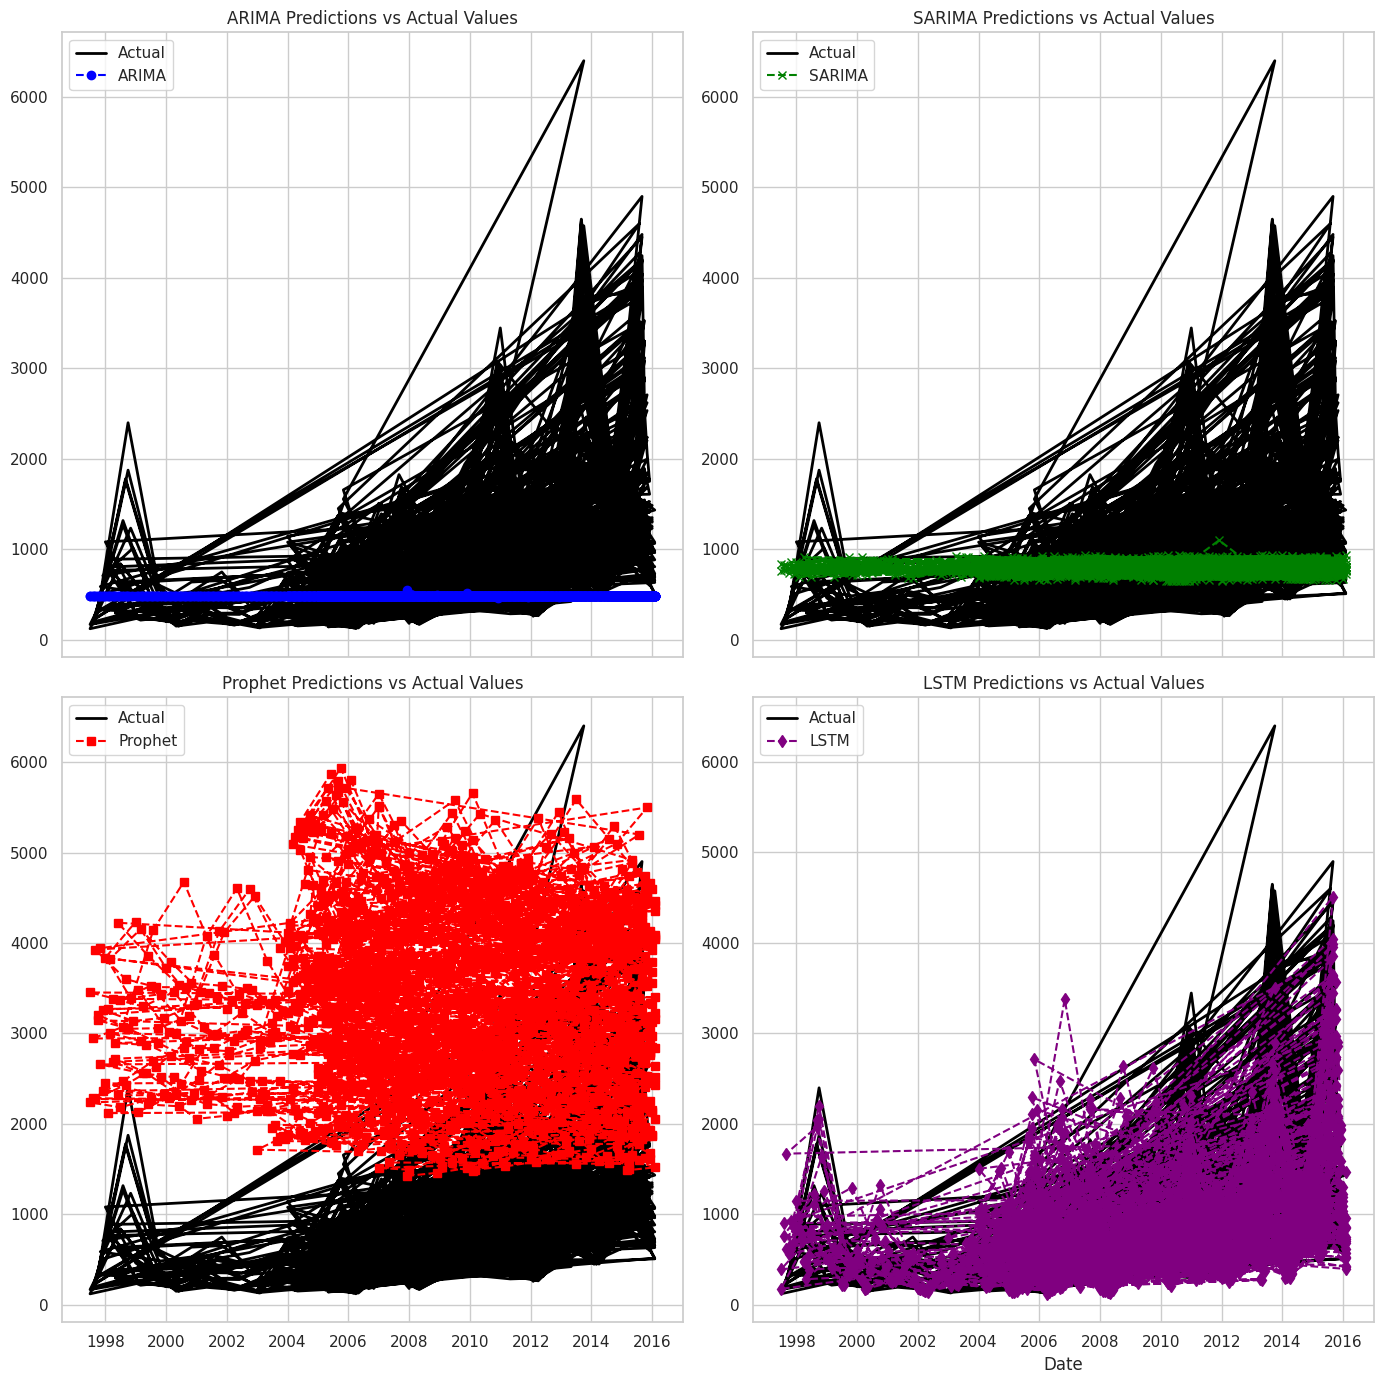

In [67]:
# Subplots in a grid layout for actual vs. predicted values from all models
fig, axes = plt.subplots(2, 2, figsize=(14, 14), sharex=True)

# Plot actual values and ARIMA predictions
axes[0, 0].plot(test.index, test['priceMod'], label='Actual', color='black', linestyle='-', linewidth=2)
axes[0, 0].plot(test.index, pred_arima, label='ARIMA', linestyle='--', marker='o', color='blue')
axes[0, 0].set_title('ARIMA Predictions vs Actual Values')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot actual values and SARIMA predictions
axes[0, 1].plot(test.index, test['priceMod'], label='Actual', color='black', linestyle='-', linewidth=2)
axes[0, 1].plot(test.index, pred_sarima, label='SARIMA', linestyle='--', marker='x', color='green')
axes[0, 1].set_title('SARIMA Predictions vs Actual Values')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot actual values and Prophet predictions
axes[1, 0].plot(test.index, test['priceMod'], label='Actual', color='black', linestyle='-', linewidth=2)
axes[1, 0].plot(test.index, pred_prophet, label='Prophet', linestyle='--', marker='s', color='red')
axes[1, 0].set_title('Prophet Predictions vs Actual Values')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot actual values and LSTM predictions
axes[1, 1].plot(test.index, test['priceMod'], label='Actual', color='black', linestyle='-', linewidth=2)
axes[1, 1].plot(test.index, pred_lstm, label='LSTM', linestyle='--', marker='d', color='purple')
axes[1, 1].set_title('LSTM Predictions vs Actual Values')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Enhance overall plot
plt.xlabel('Date')
plt.tight_layout()

# Show plot
plt.show()
